# Check the depth calculation routine in sfoda


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from datetime import datetime
from scipy.interpolate import PchipInterpolator

from glob import glob
from matplotlib import rcParams
from sfoda.roms.romsio import  get_depth


Bad key "backend.qt5" on line 5 in
/home/mrayson/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Warning - could not import octant package.


In [2]:
! ls ../ROMSdata/SUNTANS_NESTING

archive_fwd2_6293.nc  archive_fwd2_6325.nc  sta_6301.nc  sta_6333.nc
archive_fwd2_6297.nc  archive_fwd2_6329.nc  sta_6321.nc
archive_fwd2_6301.nc  archive_fwd2_6333.nc  sta_6325.nc
archive_fwd2_6321.nc  sta_6297.nc	    sta_6329.nc


In [4]:
basedir = '../ROMSdata/SUNTANS_NESTING'
outfile = '{}/archive_fwd2_6293.nc'.format(basedir)

ds = xr.open_dataset(outfile)
ds

<xarray.Dataset>
Dimensions:     (eta_rho: 482, eta_u: 482, eta_v: 481, ocean_time: 49, s_rho: 30, s_w: 31, xi_rho: 1010, xi_u: 1009, xi_v: 1010)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 ...
    lat_u       (eta_u, xi_u) float64 ...
    lat_v       (eta_v, xi_v) float64 ...
    lon_rho     (eta_rho, xi_rho) float64 ...
    lon_u       (eta_u, xi_u) float64 ...
    lon_v       (eta_v, xi_v) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 2017-03-25 ... 2017-03-29
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
Dimensions without coordinates: eta_rho, eta_u, eta_v, xi_rho, xi_u, xi_v
Data variables:
    AKs         (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    AKt         (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    AKv         (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    Cs_r        (s_rho) float64 ...
    Cs_w        (s_w) float64 ...
    h           (eta_rho, xi_rho) float64 ...
    hc          float64 ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    u           (ocean_time, s_rho, eta_u, xi_u) float64 ...
    ubar        (ocean_time, eta_u, xi_u) float64 ...
    v           (ocean_time, s_rho, eta_v, xi_v) float64 ...
    vbar        (ocean_time, eta_v, xi_v) float64 ...
    zeta        (ocean_time, eta_rho, xi_rho) float64 ...
Attributes:
    file:              fwd_outer2.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             NWS W4DVAR ROMS
    var_info:          varinfo.dat
    state_vector:      zeta, ubar, vbar, u, v, temp, salt, sustr, svstr, shfl...
    rst_file:          ./outputs/rst.nc
    his_file:          fwd_outer2.nc
    avg_file:          ./outputs/avg_outer2.nc
    sta_file:          ./outputs/sta.nc
    grd_file:          grid.nc
    ini_file:          ini.nc
    itl_file:          itl.nc
    nrm_file:          nrm_i.nc
    tlf_file:          ./outputs/tlf.nc
    obs_file:          obs.nc
    tide_file:         tide.nc
    frc_file_01:       forcing.nc
    clm_file_01:       bry.nc
    fwd_file:          fwd_outer1.nc
    script_file:       ocean.in
    apar_file:         s4dvar.in
    spos_file:         stations.in
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ADM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    ADM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    svn_url:           https://www.myroms.org/svn/src/trunk
    svn_rev:           1037
    code_dir:          /group/pawsey0219/ijanekovic/GIT/testing/trunk
    header_dir:        /group/pawsey0219/ijanekovic/NWS_ASSIM
    header_file:       nws_w4dvar.h
    os:                Linux
    cpu:               x86_64
    compiler_system:   ftn
    compiler_command:  /opt/cray/pe/craype/2.5.13/bin/ftn
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3
    tiling:            024x010
    history:           Wed Dec  2 08:44:41 2020: ncks -7 --ppc default=.5 -vt...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       NWS_W4DVAR, ADD_FSOBC, ADD_M2OBC, ADJOINT, ADJUST_BOUN...
    NCO:               netCDF Operators version 4.7.6 (Homepage = http://nco....

In [7]:
get_depth?

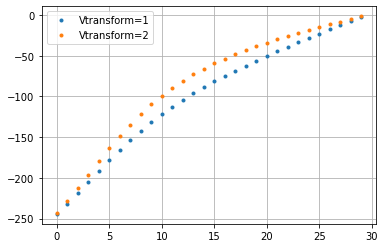

In [16]:
h=250

z1 = get_depth(ds.s_rho.values, ds.Cs_r.values, ds.hc.values, np.array([h]), Vtransform=1)
z2 = get_depth(ds.s_rho.values, ds.Cs_r.values, ds.hc.values, np.array([h]), Vtransform=2)

plt.figure()
plt.plot(z1,'.')
plt.plot(z2,'.')
plt.grid(b=True)
plt.legend(('Vtransform=1', 'Vtransform=2'))

In [21]:
def get_depth_ivica(sc_r, Cs_r, hc, h, Vtransform=2):
    zeta=0.0
    N = len(sc_r)
    r = range(N)
    z_r = np.zeros(np.hstack((N, h.shape)))
    if Vtransform == 1:
        for k in range(0,N):
            z0 = (sc_r[k] - Cs_r[k]) * hc + Cs_r[k] * h
            z_r[k,:] = z0 + zeta * (1.0 + z0/h)
    elif Vtransform == 2:
        for k in range(0,N):
            z0 = (hc * sc_r[k] + Cs_r[k] * h) / (hc + h)
            z_r[k,:] = zeta + (zeta + h) * z0
                    
    return z_r

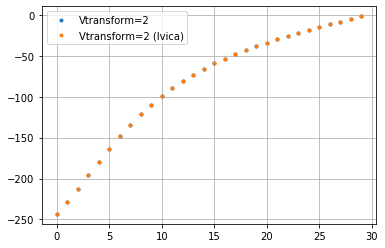

In [23]:
z2 = get_depth(ds.s_rho.values, ds.Cs_r.values, ds.hc.values, np.array([h]), Vtransform=2)
z2_i = get_depth_ivica(ds.s_rho.values, ds.Cs_r.values, ds.hc.values, np.array([h]), Vtransform=2)

plt.figure()
plt.plot(z2,'.')
plt.plot(z2_i,'.')
plt.grid(b=True)
plt.legend(('Vtransform=2', 'Vtransform=2 (Ivica)'))